## Bike Sharing - Linear Regression Assignment

### Importing required libraries

In [1]:
# Importing the required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Reading, Understanding and Exploring the Dataset

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
# Summary of numeric cols
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Converting Numerical columns to Categorical columns

In [7]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [8]:
# season (1:spring, 2:summer, 3:fall, 4:winter)
df['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)

In [9]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 91.4+ KB


In [11]:
df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [12]:
df['mnth'].replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

In [13]:
df['mnth'].value_counts()

Dec    62
Mar    62
Jul    62
Aug    62
May    62
Jan    62
Oct    62
Sep    60
Jun    60
Apr    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [14]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


In [16]:
df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [17]:
df['holiday'].replace({1:"yes", 0:"no"}, inplace=True)

In [18]:
df['holiday'].value_counts()

no     709
yes     21
Name: holiday, dtype: int64

In [19]:
df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [20]:
df['weekday'].replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}, inplace=True)

In [21]:
df['weekday'].value_counts()

Tuesday      105
Monday       105
Thursday     104
Wednesday    104
Friday       104
Sunday       104
Saturday     104
Name: weekday, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


In [23]:
df.yr = df.yr.astype('object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(6)
memory usage: 91.4+ KB


In [25]:
df['workingday'].replace({1:"yes", 0:"no"}, inplace=True)

In [26]:
df['weathersit'].replace({1:"Clear", 2:"Mist", 3:"Light snow", 4:"Heavy Rain"}, inplace = True)

In [27]:
df['weathersit'].value_counts()

Clear         463
Mist          246
Light snow     21
Name: weathersit, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    object 
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(8)
memory usage: 91.4+ KB


In [29]:
df['dteday'] = df['dteday'].astype('datetime64')

# Data Visualization

### Plot distplot for temp, atemp, hum, windspeed, cnt columns

In [30]:
df.describe().columns

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
       'cnt'],
      dtype='object')

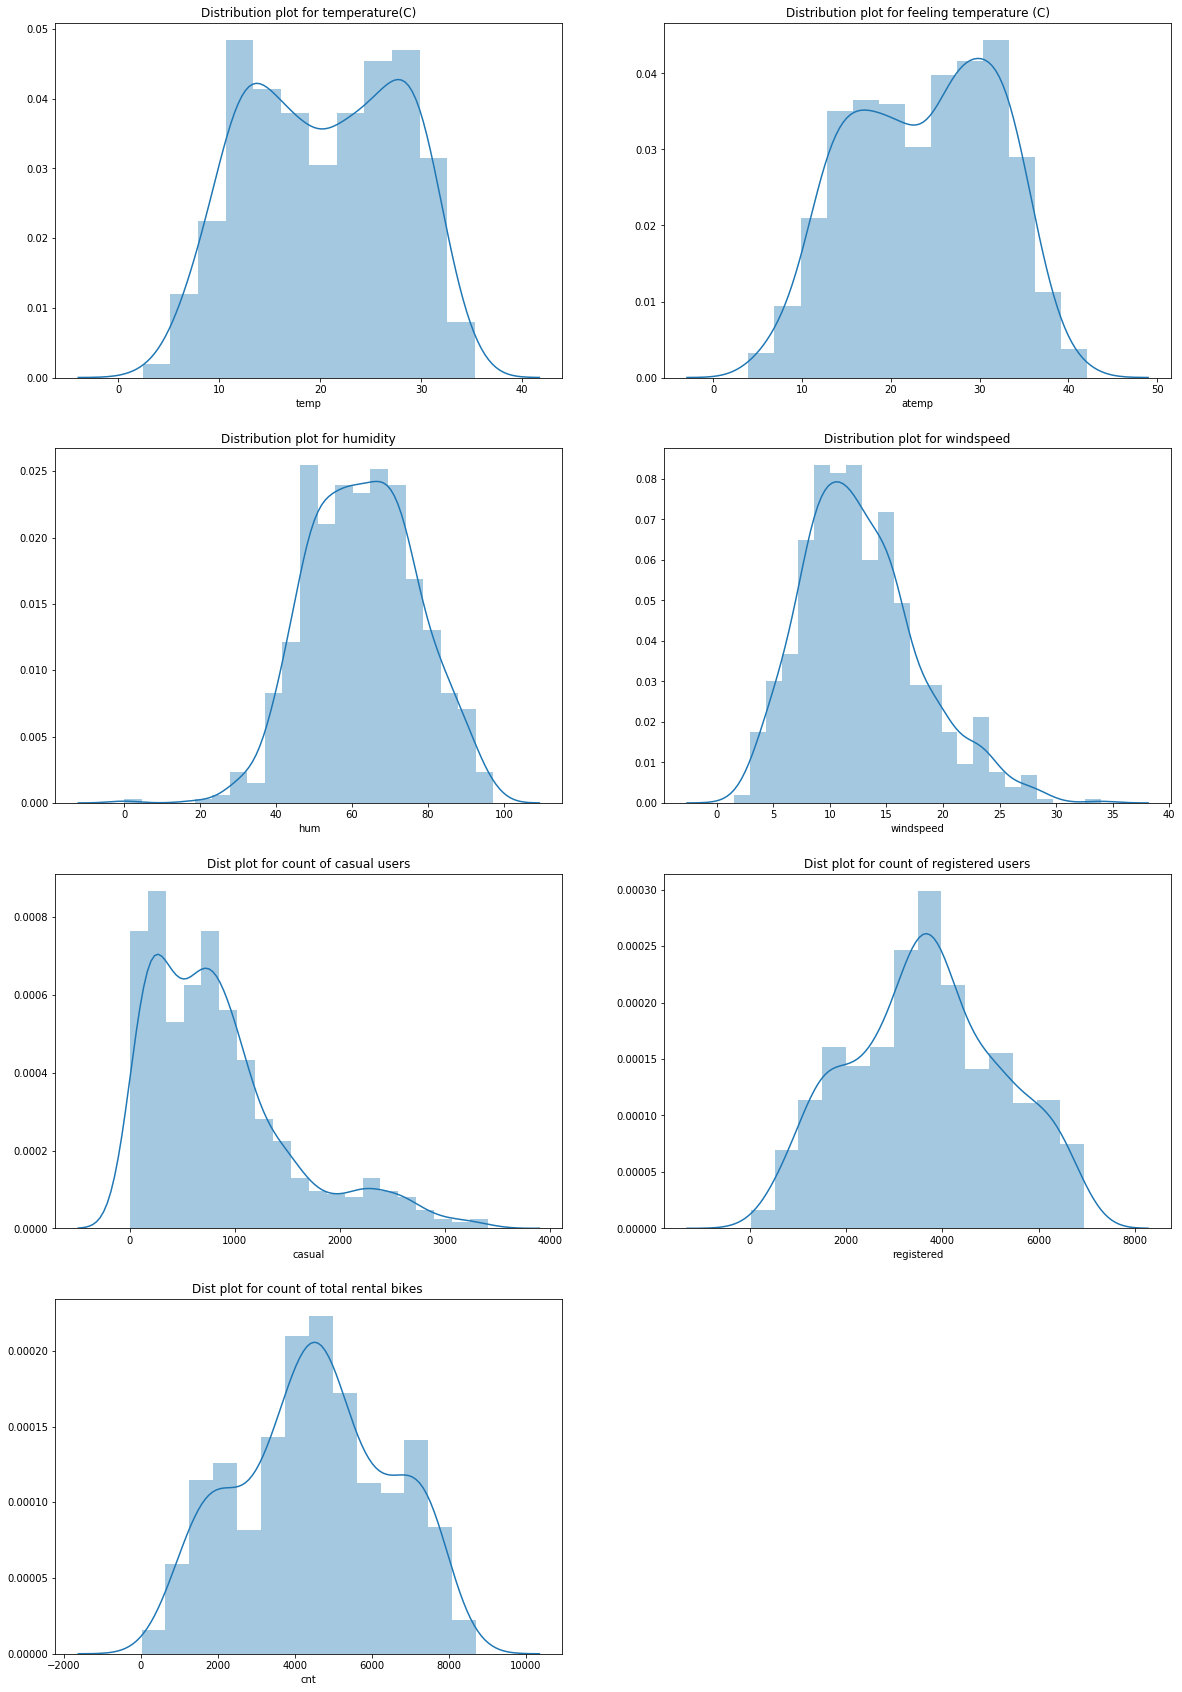

In [31]:
plt.figure(figsize = [20,30])
plt.subplot(4,2,1) 
sns.distplot(df['temp'])
plt.title("Distribution plot for temperature(C)")
plt.subplot(4,2,2)
sns.distplot(df['atemp'])
plt.title("Distribution plot for feeling temperature (C)")
plt.subplot(4,2,3)
sns.distplot(df['hum'])
plt.title("Distribution plot for humidity")
plt.subplot(4,2,4)
sns.distplot(df['windspeed'])
plt.title("Distribution plot for windspeed")
plt.subplot(4,2,5)
sns.distplot(df['casual'])
plt.title("Dist plot for count of casual users")
plt.subplot(4,2,6)
sns.distplot(df['registered'])
plt.title("Dist plot for count of registered users")
plt.subplot(4,2,7)
sns.distplot(df['cnt'])
plt.title("Dist plot for count of total rental bikes ")
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [33]:
# Categorical columns
df_categorical = df.select_dtypes(exclude=['float64','int64','datetime64'])

In [34]:
df_categorical.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [35]:
len(df_categorical.columns)

7

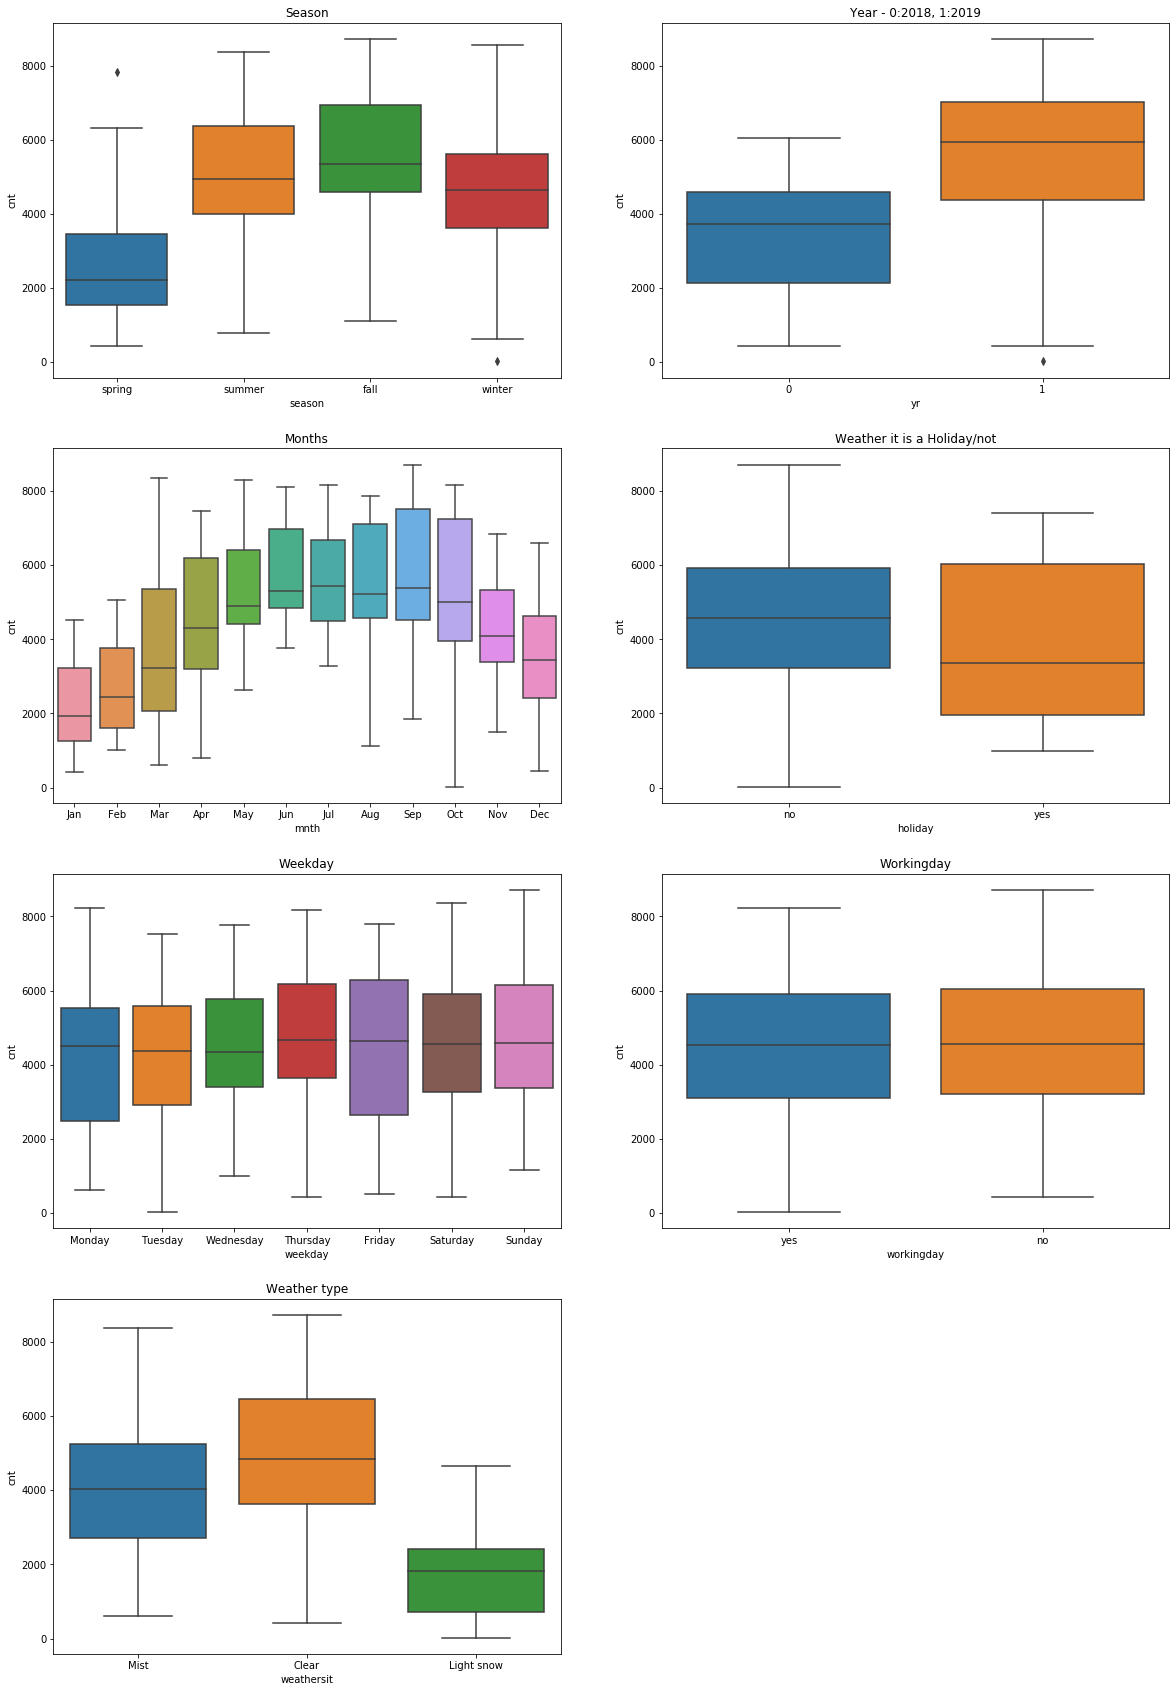

In [36]:
plt.figure(figsize=(20,30))
plt.subplot(4,2,1)
sns.boxplot(x='season', y='cnt', data=df)
plt.title("Season")
plt.subplot(4,2,2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.title("Year - 0:2018, 1:2019")
plt.subplot(4,2,3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title("Months")
plt.subplot(4,2,4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title("Weather it is a Holiday/not")
plt.subplot(4,2,5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title("Weekday")
plt.subplot(4,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)
plt.title("Workingday")
plt.subplot(4,2,7)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title("Weather type")
plt.show();

In [37]:
numeric_cols = df[['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [38]:
numeric_cols.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


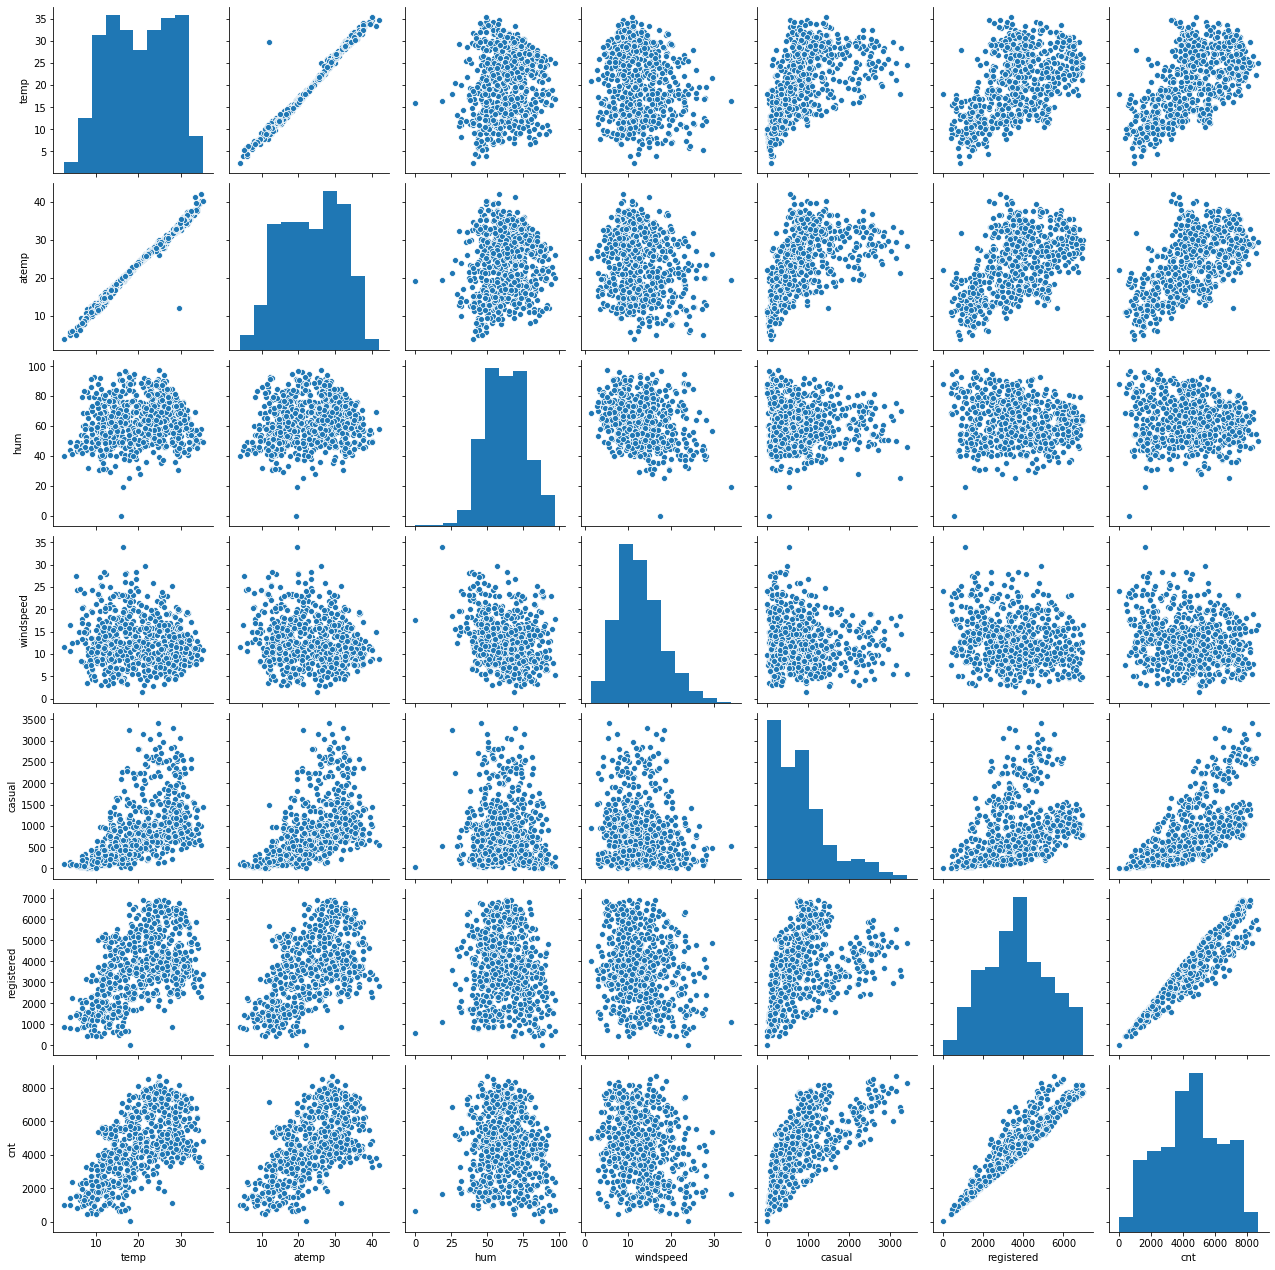

In [39]:
sns.pairplot(numeric_cols)
plt.show()

In [40]:
# Correlation
x = numeric_cols.corr()

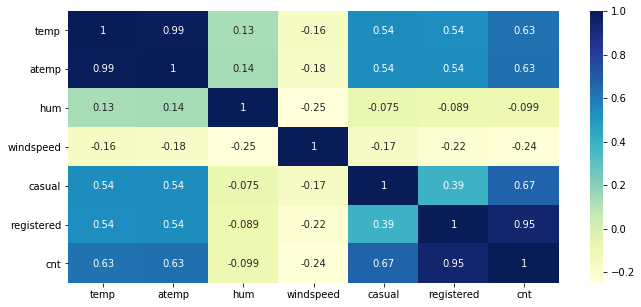

In [41]:
plt.figure(figsize=(11, 5))
sns.heatmap(x, annot=True, cmap = "YlGnBu")

Based on above heatmap below are some insights:

Correlation of cnt with respect to independent variables:
- Cnt is postively correlated with temp, atemp, casual and registered.
- Cnt is highly correlated with registered (0.95), It is evident that registered users will hire the bike more frequently.
- Cnt is negatively correlated to hum and windspeed. This suggest that on windy and on humid days, people prefer less likely to hire a bike.

Correlation among independent variables:
- temp and atemp are highly positively correlated. 

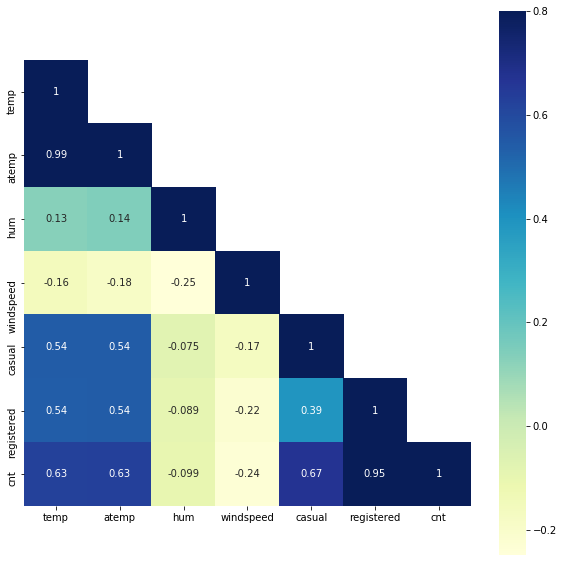

In [42]:
# Heatmap

mask = np.array(x)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(x,annot=True, mask=mask, vmax=0.8, square=True, cmap = "YlGnBu");

In [43]:
df.drop('atemp',axis=1,inplace=True)

In [44]:
df.drop('instant',axis=1,inplace=True)

In [45]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,no,Monday,yes,Mist,14.110847,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,no,Tuesday,yes,Mist,14.902598,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,no,Wednesday,yes,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,no,Thursday,yes,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,no,Friday,yes,Clear,9.305237,43.6957,12.522300,82,1518,1600


# Data Preparation

In [46]:
 df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,no,Monday,yes,Mist,14.110847,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,no,Tuesday,yes,Mist,14.902598,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,no,Wednesday,yes,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,no,Thursday,yes,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,no,Friday,yes,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    object        
 4   holiday     730 non-null    object        
 5   weekday     730 non-null    object        
 6   workingday  730 non-null    object        
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   hum         730 non-null    float64       
 10  windspeed   730 non-null    float64       
 11  casual      730 non-null    int64         
 12  registered  730 non-null    int64         
 13  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 80.0+ KB


In [48]:
# Subset all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,no,Monday,yes,Mist
1,spring,0,Jan,no,Tuesday,yes,Mist
2,spring,0,Jan,no,Wednesday,yes,Clear
3,spring,0,Jan,no,Thursday,yes,Clear
4,spring,0,Jan,no,Friday,yes,Clear


In [49]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weathersit_Light snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   season_spring          730 non-null    uint8
 1   season_summer          730 non-null    uint8
 2   season_winter          730 non-null    uint8
 3   yr_1                   730 non-null    uint8
 4   mnth_Aug               730 non-null    uint8
 5   mnth_Dec               730 non-null    uint8
 6   mnth_Feb               730 non-null    uint8
 7   mnth_Jan               730 non-null    uint8
 8   mnth_Jul               730 non-null    uint8
 9   mnth_Jun               730 non-null    uint8
 10  mnth_Mar               730 non-null    uint8
 11  mnth_May               730 non-null    uint8
 12  mnth_Nov               730 non-null    uint8
 13  mnth_Oct               730 non-null    uint8
 14  mnth_Sep               730 non-null    uint8
 15  holiday_yes            730 non-null    u

In [51]:
list(df_categorical.columns)

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [52]:
df = df.drop(list(df_categorical.columns),axis=1)

In [53]:
df.shape

(730, 7)

In [54]:
df.columns

Index(['dteday', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [55]:
df = pd.concat([df, df_dummies], axis=1)

In [56]:
df.head()

,dteday,temp,hum,windspeed,casual,registered,cnt,season_spring,season_summer,season_winter,...,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weathersit_Light snow,weathersit_Mist
0,2018-01-01,14.110847,80.5833,10.749882,331,654,985,1,0,0,...,0,1,0,0,0,0,0,1,0,1
1,2018-02-01,14.902598,69.6087,16.652113,131,670,801,1,0,0,...,0,0,0,0,0,1,0,1,0,1
2,2018-03-01,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2018-04-01,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2018-05-01,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# We dont need the `dteday` column for our model building as we already have weekday and weekend coluumns in our dataset.Also we dont need `casual` and `registered` columns as their sum is already being captured in our target variable `cnt`.Let's drop them now.
df = df.drop(['dteday','casual','registered'], axis=1)

In [58]:
df.shape

(730, 29)

# Model Building

In [59]:
X = df.drop('cnt', axis=1)
y = df['cnt']

In [60]:
X.shape

(730, 28)

In [61]:
y.shape

(730,)

In [62]:
# train-test-split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.2, random_state=100)

In [63]:
X_train.shape

(510, 28)

In [64]:
X_test.shape

(146, 28)

In [65]:
y_train.shape

(510,)

In [66]:
y_test.shape

(146,)

In [67]:
X_train.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_1', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sep', 'holiday_yes', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'workingday_yes', 'weathersit_Light snow',
       'weathersit_Mist'],
      dtype='object')

# Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
list(df.describe().columns)

['temp',
 'hum',
 'windspeed',
 'cnt',
 'season_spring',
 'season_summer',
 'season_winter',
 'yr_1',
 'mnth_Aug',
 'mnth_Dec',
 'mnth_Feb',
 'mnth_Jan',
 'mnth_Jul',
 'mnth_Jun',
 'mnth_Mar',
 'mnth_May',
 'mnth_Nov',
 'mnth_Oct',
 'mnth_Sep',
 'holiday_yes',
 'weekday_Monday',
 'weekday_Saturday',
 'weekday_Sunday',
 'weekday_Thursday',
 'weekday_Tuesday',
 'weekday_Wednesday',
 'workingday_yes',
 'weathersit_Light snow',
 'weathersit_Mist']

In [70]:
# scaling on columns
# scale_var = ['temp','hum','windspeed']
X_train[['temp','hum','windspeed']] = scaler.fit_transform(X_train[['temp','hum','windspeed']])
X_test[['temp','hum','windspeed']] = scaler.transform(X_test[['temp','hum','windspeed']])

In [71]:
X_train.head()

,temp,hum,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,workingday_yes,weathersit_Light snow,weathersit_Mist
367,-1.904056,-1.416031,2.296676,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
648,-0.315448,-1.254276,-0.110887,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44,-0.426929,-1.895202,2.979896,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
705,-0.951822,0.949292,-0.777876,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
379,-1.811153,-1.577786,0.800240,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [72]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
reg.coef_

array([ 8.20030123e+02, -1.60977827e+02, -2.40574226e+02, -5.49534869e+02,
        4.07919519e+02,  9.40600281e+02,  1.94479184e+03,  3.29743313e+02,
       -4.46622157e+02, -1.88144581e+02, -4.72411030e+02, -1.71585602e+02,
        1.43235875e+02,  9.41988152e+01,  1.73068656e+02, -4.35429088e+02,
        1.88370512e+02,  7.35091754e+02, -1.08067777e+03, -2.73964843e+02,
       -3.66684476e+02, -2.79605896e+02,  2.77878669e-01, -2.86496756e+02,
       -2.62566729e+01, -3.28971958e+02, -2.26714340e+03, -4.82891757e+02])

In [74]:
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])

In [75]:
coeff_df

,Coefficient
temp,820.030123
hum,-160.977827
windspeed,-240.574226
season_spring,-549.534869
season_summer,407.919519
season_winter,940.600281
yr_1,1944.791842
mnth_Aug,329.743313
mnth_Dec,-446.622157
mnth_Feb,-188.144581


In [76]:
print(reg.intercept_)

3981.8986167916223


In [77]:
# Making  predictions

y_pred = reg.predict(X_test)

In [78]:
compare = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})

In [79]:
compare

,Actual,Predicted
184,6043,3632.738922
535,6211,7768.919521
299,2659,3928.106176
221,4780,5456.058343
152,4968,5254.535914
...,...,...
219,4326,5249.618792
719,3623,2839.024181
3,1562,1444.157406
392,4023,3540.703813


In [80]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 633.5823560950336
Mean Squared Error: 685293.9848564751
Root Mean Squared Error: 827.824851557668


In [81]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7982307932066184

In [82]:
# Adjusted r2 on Train data

yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8531673949014125 0.8446199667459853


In [83]:
# on Test data
yhat = reg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7982307932066182 0.7499441454270054


In [84]:
len(X_train.columns)

28

#### Model Building Using RFE

Let's now build a model using recursive feature elimination to select features because we have 28 features. It is difficult to manually eliminate these features. Let us take 20 features randomly and then use the `statsmodels` library to build models using the shortlisted features.

# Model Building using RFE

In [85]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('hum', False, 3),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_1', True, 1),
 ('mnth_Aug', False, 2),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 6),
 ('mnth_Mar', False, 7),
 ('mnth_May', False, 4),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 5),
 ('mnth_Sep', True, 1),
 ('holiday_yes', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 8),
 ('workingday_yes', True, 1),
 ('weathersit_Light snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [88]:
X_train.columns[rfe.support_]

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_1', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov',
       'mnth_Sep', 'holiday_yes', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Tuesday', 'workingday_yes',
       'weathersit_Light snow', 'weathersit_Mist'],
      dtype='object')

In [89]:
len(X_train.columns[rfe.support_])

20

In [90]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,temp,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,workingday_yes,weathersit_Light snow,weathersit_Mist
367,-1.904056,2.296676,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
648,-0.315448,-0.110887,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
44,-0.426929,2.979896,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
705,-0.951822,-0.777876,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
379,-1.811153,0.800240,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0


In [91]:
# Model Build

X = sm.add_constant(X_train_rfe) #Adding the constant
X.head()

,const,temp,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Dec,mnth_Feb,mnth_Jan,...,mnth_Nov,mnth_Sep,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,workingday_yes,weathersit_Light snow,weathersit_Mist
367,1.0,-1.904056,2.296676,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
648,1.0,-0.315448,-0.110887,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44,1.0,-0.426929,2.979896,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
705,1.0,-0.951822,-0.777876,0,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
379,1.0,-1.811153,0.800240,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [92]:
# Fitting the model with 20 variables
lm = sm.OLS(y_train, X) 
lm_model = lm.fit()
lm_model.summary() # model summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     138.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.37e-186
Time:                        23:30:24   Log-Likelihood:                -4096.6
No. Observations:                 510   AIC:                             8235.
Df Residuals:                     489   BIC:                             8324.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4244.8368    612.897      6.926      0.000    3040.599    5449.074
temp                    787.7035     70.520     11.170      0.000     649.144     926.263
windspeed              -208.2174     35.679     -5.836      0.000    -278.321    -138.114
season_spring          -711.7315    188.376     -3.778      0.000   -1081.858    -341.605
season_summer           224.0433    130.691      1.714      0.087     -32.742     480.829
season_winter           813.1644    145.373      5.594      0.000     527.531    1098.798
yr_1                   1978.0467     68.253     28.981      0.000    1843.940    2112.153
mnth_Dec               -664.6182    151.773     -4.379      0.000    -962.826    -366.410
mnth_Feb               -305.7963    178.732     -1.711      0.088    -656.973      45.380
mnth_Jan               -607.3664    183.014     -3.319      0.001    -966.958    -247.775
mnth_Jul               -423.1167    156.864     -2.697      0.007    -731.327    -114.906
mnth_Nov               -619.8990    164.867     -3.760      0.000    -943.835    -295.963
mnth_Sep                441.3035    139.982      3.153      0.002     166.262     716.345
holiday_yes           -1014.2431    557.267     -1.820      0.069   -2109.177      80.691
weekday_Monday         -256.9707    100.543     -2.556      0.011    -454.520     -59.421
weekday_Saturday       -283.2933    595.966     -0.475      0.635   -1454.264     887.677
weekday_Sunday         -169.7495    594.400     -0.286      0.775   -1337.643     998.144
weekday_Tuesday        -295.0099     99.006     -2.980      0.003    -489.540    -100.480
workingday_yes         -249.8250    597.158     -0.418      0.676   -1423.137     923.487
weathersit_Light snow -2653.8090    205.712    -12.901      0.000   -3057.997   -2249.621
weathersit_Mist        -659.1811     73.487     -8.970      0.000    -803.571    -514.791
==============================================================================
Omnibus:                       56.180   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              111.457
Skew:                          -0.643   Prob(JB):                     6.27e-25
Kurtosis:                       4.894   Cond. No.                         58.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,330.82
18,workingday_yes,63.37
16,weekday_Sunday,37.73
15,weekday_Saturday,31.53
13,holiday_yes,7.81
3,season_spring,5.81
1,temp,4.38
5,season_winter,3.52
4,season_summer,2.81
9,mnth_Jan,2.23


#### As we can see that some of the variables have high VIF value as well high p-value. Lets start by dropping those variables.

In [94]:
#dropping workingday_yes
X_train_rfe.drop('workingday_yes', axis = 1, inplace = True)

In [95]:
# Refitting
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 19 variables
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     145.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.22e-187
Time:                        23:30:24   Log-Likelihood:                -4096.7
No. Observations:                 510   AIC:                             8233.
Df Residuals:                     490   BIC:                             8318.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3994.73

In [96]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.09
3,season_spring,5.81
1,temp,4.38
5,season_winter,3.52
4,season_summer,2.81
9,mnth_Jan,2.23
8,mnth_Feb,1.89
11,mnth_Nov,1.83
7,mnth_Dec,1.66
10,mnth_Jul,1.57


#### We still have some variables with high p-value(>0.05). Lets drop 

In [97]:
# Let's drop Weekday_Saturday which has p value to 0.73
X_train_rfe.drop('weekday_Saturday', axis = 1, inplace = True)

In [98]:
# Refitting
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model with 19 variables
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.1
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.03e-188
Time:                        23:30:25   Log-Likelihood:                -4096.7
No. Observations:                 510   AIC:                             8231.
Df Residuals:                     491   BIC:                             8312.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  3985.93

In [99]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.50
3,season_spring,5.81
1,temp,4.38
5,season_winter,3.52
4,season_summer,2.81
9,mnth_Jan,2.23
8,mnth_Feb,1.89
11,mnth_Nov,1.82
7,mnth_Dec,1.66
10,mnth_Jul,1.57


In [100]:
# Let's drop Weekday_Sunday which has p value to 0.413
X_train_rfe.drop('weekday_Sunday', axis = 1, inplace = True)

In [101]:
# Refitting
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.3
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.11e-189
Time:                        23:30:25   Log-Likelihood:                -4097.1
No. Observations:                 510   AIC:                             8230.
Df Residuals:                     492   BIC:                             8306.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4007.13

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.91
3,season_spring,5.80
1,temp,4.37
5,season_winter,3.51
4,season_summer,2.80
9,mnth_Jan,2.23
8,mnth_Feb,1.89
11,mnth_Nov,1.82
7,mnth_Dec,1.66
10,mnth_Jul,1.56


In [103]:
#dropping season_summer
X_train_rfe.drop('season_summer', axis = 1, inplace = True)

In [104]:
# Refitting
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     172.6
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          3.43e-190
Time:                        23:30:26   Log-Likelihood:                -4098.6
No. Observations:                 510   AIC:                             8231.
Df Residuals:                     493   BIC:                             8303.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4176.82

In [105]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.02
3,season_spring,3.61
1,temp,3.59
4,season_winter,2.19
8,mnth_Jan,2.16
7,mnth_Feb,1.87
10,mnth_Nov,1.74
6,mnth_Dec,1.59
9,mnth_Jul,1.34
11,mnth_Sep,1.13


In [106]:
#dropping mnth_feb, which as p value >0.05
X_train_rfe.drop('mnth_Feb', axis = 1, inplace = True)

In [107]:
# Refitting
X_train_rfe = sm.add_constant(X_train_rfe)

# Fitting the model 
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     182.9
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          1.55e-190
Time:                        23:30:26   Log-Likelihood:                -4100.5
No. Observations:                 510   AIC:                             8233.
Df Residuals:                     494   BIC:                             8301.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4166.11

In [108]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,5.99
1,temp,3.45
3,season_spring,2.82
4,season_winter,2.18
9,mnth_Nov,1.71
7,mnth_Jan,1.56
6,mnth_Dec,1.43
8,mnth_Jul,1.34
10,mnth_Sep,1.13
2,windspeed,1.11


All the VIF values and p-values seem to be in a good range. Also the `Adjusted R-squared` value has dropped from `0.844` with 21 variables to just `0.843` using 16 variables. 

# Residual Analysis

In [109]:
lm1 = sm.OLS(y_train, X_train_rfe).fit()

In [110]:
y_train_pred = lm1.predict(X_train_rfe)

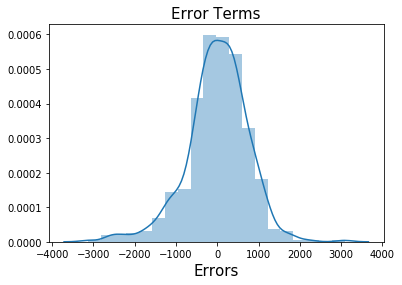

In [111]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=20)
plt.title("Error Terms", fontsize=15)
plt.xlabel("Errors", fontsize=15);

#### The Error Terms are fairly normally distributed. Let's now make predictions on the test-set.

# Predictions on Test data

In [112]:
X_test_rfe = X_test[X_test.columns[rfe.support_]]
X_test_rfe.head()

,temp,windspeed,season_spring,season_summer,season_winter,yr_1,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_yes,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,workingday_yes,weathersit_Light snow,weathersit_Mist
184,1.310322,-1.420339,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
535,1.621539,-0.997450,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
299,-0.120356,0.100565,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
221,1.533285,0.133198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152,1.245289,1.336868,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [113]:
# Let's now drop the variables we had eliminated 
X_test_rfe = X_test_rfe.drop(['workingday_yes', 'weekday_Saturday', 'weekday_Sunday','season_summer','mnth_Feb'], axis = 1)

In [114]:
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  146 non-null    float64
 1   temp                   146 non-null    float64
 2   windspeed              146 non-null    float64
 3   season_spring          146 non-null    uint8  
 4   season_winter          146 non-null    uint8  
 5   yr_1                   146 non-null    uint8  
 6   mnth_Dec               146 non-null    uint8  
 7   mnth_Jan               146 non-null    uint8  
 8   mnth_Jul               146 non-null    uint8  
 9   mnth_Nov               146 non-null    uint8  
 10  mnth_Sep               146 non-null    uint8  
 11  holiday_yes            146 non-null    uint8  
 12  weekday_Monday         146 non-null    uint8  
 13  weekday_Tuesday        146 non-null    uint8  
 14  weathersit_Light snow  146 non-null    uint8  
 15  weat

In [115]:
# Making predictions
y_pred1 = lm1.predict(X_test_rfe)

Text(0, 0.5, 'y_pred1')

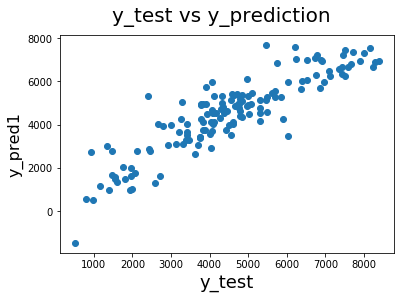

In [116]:
# Plotting y_test and y_pred 
fig = plt.figure()
plt.scatter(y_test, y_pred1)
fig.suptitle('y_test vs y_prediction', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                     
plt.ylabel('y_pred1', fontsize = 16)  

From the above plot, the model is doing well on the test set as well. 

In [117]:
# Let's also check the R-squared  value for the test set. r2_score for 18 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.7902066498469476